https://www.toptal.com/machine-learning/nlp-tutorial-text-classification

In [46]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

In [47]:
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv(r"D:\Data\wine-reviews\winemag-data-130k-v2.csv")

In [49]:
counter = Counter(df['variety'].tolist())

In [50]:
type(counter)

collections.Counter

In [51]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

In [52]:
df['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [53]:
description_list = df['description'].tolist()

In [54]:
description_list[0]

'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.'

In [55]:
varietal_list = [top_10_varieties[i] for i in df['variety'].tolist()]
varietal_list = np.array(varietal_list)
#note: this is making a list of the wine varieties by their index in the top 10

In [56]:
varietal_list[:10]

array([5, 0, 2, 2, 1, 5, 3, 0, 9, 0])

In [57]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)

In [58]:
x_train_counts.get_shape()

(71322, 23888)

In [59]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [60]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

In [61]:
x_train_tfidf.get_shape()

(71322, 23888)

In [62]:
clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

In [63]:
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

In [64]:
print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 63.24%


# This is making the RNN

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from util import get_top_x

In [66]:
#df and df['variety'] already exist here
#counter already exists in this file, otherwise make a counter on df['variety']

In [67]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}

In [68]:
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

In [69]:
description_list = df['description'].tolist()

In [70]:
mapped_list, word_list = get_top_x.filter_to_top_x(description_list, 2500, 10)

In [71]:
varietal_list_o = [top_10_varieties[i] for i in df['variety'].tolist()]

In [72]:
varietal_list = to_categorical(varietal_list_o)

In [73]:
max_review_length = 150

In [74]:
mapped_list = sequence.pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, varietal_list, test_size=0.3)

In [75]:
max_review_length = 150

In [76]:
embedding_vector_length = 64

In [77]:
model = Sequential()

In [78]:
model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(varietal_list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=5, validation_split=0.1,batch_size=64)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 44932 samples, validate on 4993 samples
Epoch 1/5
44932/44932 [==============================] - 8s 176us/step - loss: 1.0795 - acc: 0.6178 - val_loss: 0.7644 - val_acc: 0.7436
Epoch 2/5
44932/44932 [==============================] - 3s 70us/step - loss: 0.6528 - acc: 0.7775 - val_loss: 0.7052 - val_acc: 0.7639
Epoch 3/5
44932/44932 [==============================] - 3s 69us/step - loss: 0.5388 - acc: 0.8155 - val_loss: 0.7038 - val_acc: 0.7613
Epoch 4/5
44932/44932 [==============================] - 3s 69us/step - loss: 0.4397 - acc: 0.8484 - val_loss: 0.7645 - val_acc: 0.7611
Epoch 5/5
44932/44932 [==============================] - 3s 70us/step - loss: 0.3349 - acc: 0.8865 - val_loss: 0.8476 - val_acc: 0.7531


In [77]:
y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

In [78]:
print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 75.87%


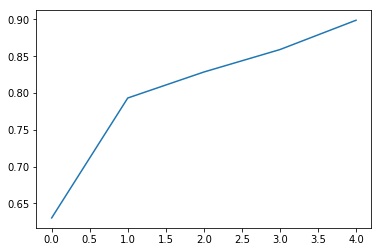

In [79]:
plt.plot(history.history['acc'])

In [58]:
list(history.history.keys())

['loss', 'acc']